In [2]:
import pandas as pd

pd.read_csv("data_warehouse/fato_corrida.csv")

,passenger_count,trip_distance,trip_duration,fare_amount,tip_amount,tolls_amount,total_amount,dim_tempo_id,dim_pagamento_id,dim_tarifa_id,corrida_id
0,1,4.200377,4.10,12.1,0.00,0.0,15.35,669,2,2,0
1,1,1.335752,4.80,7.2,1.00,0.0,9.70,277,0,2,1
2,4,3.009466,10.03,12.1,0.00,0.0,16.10,160,2,2,2
3,2,7.370777,19.58,23.3,5.46,0.0,32.76,650,0,2,3
4,1,6.614387,22.53,24.7,6.55,0.0,32.75,545,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...
28435,1,5.632690,18.32,19.8,4.76,0.0,28.56,27,0,2,28435
28436,1,3.556641,18.88,17.7,0.00,0.0,22.45,299,2,2,28436
28437,1,1.818554,6.70,8.6,3.77,0.0,18.87,136,0,2,28437
28438,1,5.680970,12.98,17.7,0.00,0.0,23.45,726,2,2,28438


In [5]:
fato = pd.read_csv("data_warehouse/fato_corrida.csv")
dim_tempo = pd.read_csv("data_warehouse/dim_tempo.csv")
dim_pagamento = pd.read_csv("data_warehouse/dim_pagamento.csv")
dim_tarifa = pd.read_csv("data_warehouse/dim_tarifa.csv")

df = fato.merge(dim_tempo, on="dim_tempo_id", how="left") \
         .merge(dim_pagamento, on="dim_pagamento_id", how="left", suffixes=('', '_pagto')) \
         .merge(dim_tarifa, on="dim_tarifa_id", how="left", suffixes=('', '_tarifa'))

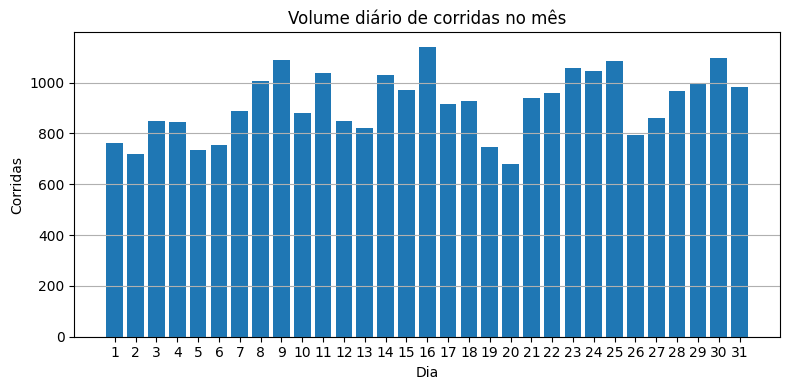

In [9]:
import matplotlib.pyplot as plt

corridas_por_dia = df.groupby("day")["corrida_id"].count().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(corridas_por_dia["day"], corridas_por_dia["corrida_id"])
plt.title("Volume diário de corridas no mês")
plt.xlabel("Dia")
plt.ylabel("Corridas")
plt.xticks(corridas_por_dia["day"])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

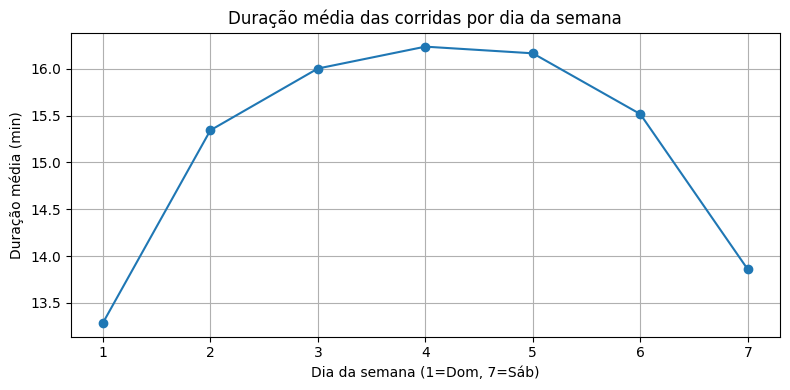

In [10]:
duracao_por_dia_semana = df.groupby("day_of_week")["trip_duration"].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(duracao_por_dia_semana["day_of_week"], duracao_por_dia_semana["trip_duration"], marker='o')
plt.title("Duração média das corridas por dia da semana")
plt.xlabel("Dia da semana (1=Dom, 7=Sáb)")
plt.ylabel("Duração média (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

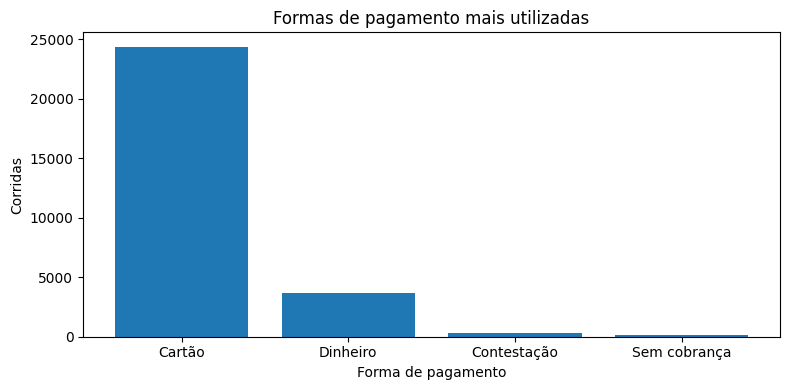

In [13]:
ranking_pagamento = df.groupby("descricao")["corrida_id"].count().reset_index().sort_values(by="corrida_id", ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(ranking_pagamento["descricao"], ranking_pagamento["corrida_id"])
plt.title("Formas de pagamento mais utilizadas")
plt.xlabel("Forma de pagamento")
plt.ylabel("Corridas")
plt.tight_layout()
plt.show()

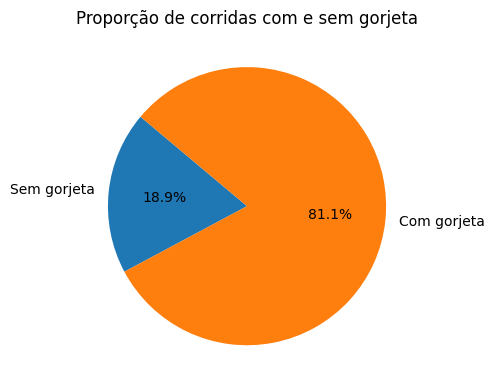

In [15]:
df["tem_gorjeta"] = df["tip_amount"] > 0
gorjeta_analise = df.groupby("tem_gorjeta")["corrida_id"].count().reset_index()

plt.figure(figsize=(6, 4))
labels = ["Sem gorjeta", "Com gorjeta"]
plt.pie(gorjeta_analise["corrida_id"], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Proporção de corridas com e sem gorjeta")
plt.tight_layout()
plt.show()